In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
plt.close()

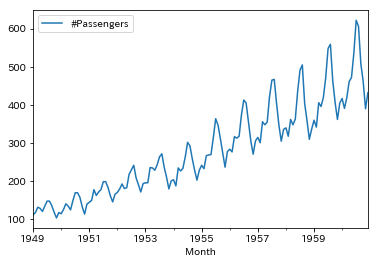

In [70]:
#解析対象のデータ
df = pd.read_csv("AirPassengers.csv", index_col=0,parse_dates=[0])
df.plot()

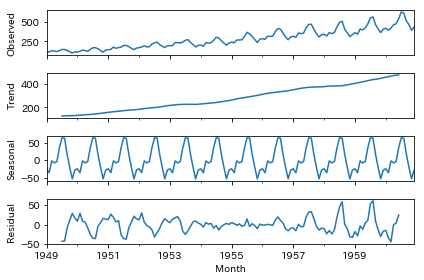

In [52]:
#トレンド、季節性、残渣への分解
res = sm.tsa.seasonal_decompose(df)
fig = res.plot()

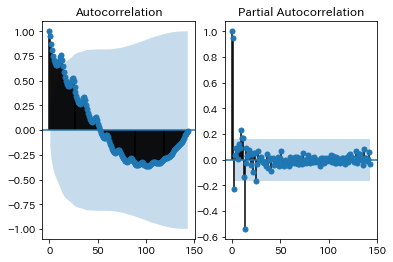

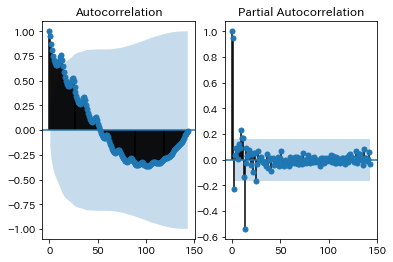

In [54]:
#自己相関と偏自己相関
fig, axes = plt.subplots(1,2)
sm.tsa.graphics.plot_acf(df ,ax=axes[0])
sm.tsa.graphics.plot_pacf(df ,ax=axes[1])

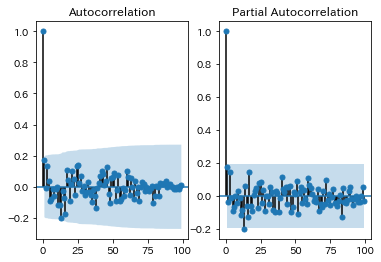

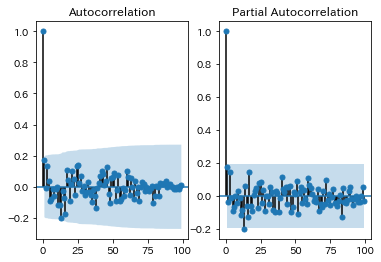

In [57]:
#比較：ホワイトノイズの場合→自己相関無し
wn = pd.Series(np.random.randn(100))

fig, axes = plt.subplots(1,2)
sm.tsa.graphics.plot_acf(wn ,ax=axes[0])
sm.tsa.graphics.plot_pacf(wn ,ax=axes[1])

***************
ARIMAモデルへの当てはめ
***************

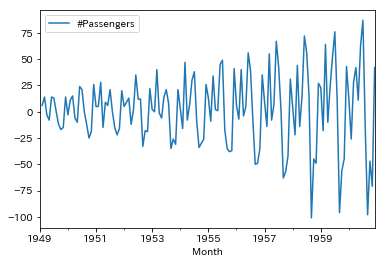

In [60]:
#階差を取る
df.diff().plot()

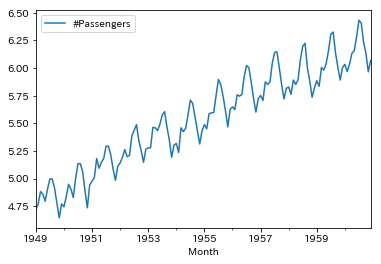

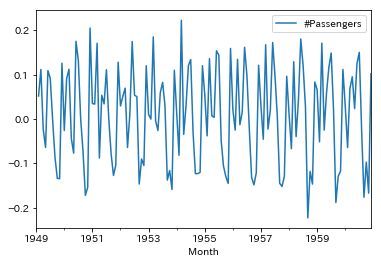

In [63]:
#LOGを取って振幅を一定にする
ldf = np.log(df)
ldf.plot()
ldf.diff().plot()

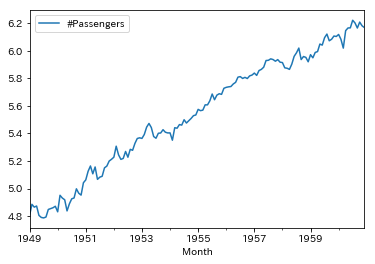

In [64]:
#季節性を除去したもの
res = sm.tsa.seasonal_decompose(ldf)
seasonal_adjust = (ldf - res.seasonal)
seasonal_adjust.plot()

単位近検定(ADF検定)

In [71]:
#生データ
sm.tsa.adfuller(df["#Passengers"])[1]

0.99188024343764103

In [72]:
#logデータ
sm.tsa.adfuller(ldf["#Passengers"])[1]

0.42236677477039075

In [73]:
#log+階差
sm.tsa.adfuller(ldf["#Passengers"].diff().dropna())[1]

0.071120548150854723

In [74]:
#log+季節性除去+階差
sm.tsa.adfuller(seasonal_adjust["#Passengers"].diff().dropna())[1]

8.0990048658610833e-09

In [78]:
mod_seasonal = sm.tsa.SARIMAX(ldf, trend='c', order=(1,1,1), seasonal_order=(0,1,2,12))
res_seasonal = mod_seasonal.fit()
res_seasonal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 2, 12)   Log Likelihood                 244.639
Date:                            Tue, 10 Apr 2018   AIC                           -477.278
Time:                                    18:26:26   BIC                           -459.459
Sample:                                01-01-1949   HQIC                          -470.037
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.001     -0.207      0.836      -0.002       0.002
ar.L1         -0.0156      0.211     -0.074      0.941      -0.429       0.398
ma.L1         -0.3980      0.197     -2.018      0.044      -0.785      -0.011
ma.S.L12      -0.6695      0.096     -6.939      0.000      -0.859      -0.480
ma.S.L24       0.1307      0.109      1.205      0.228      -0.082       0.343
sigma2         0.0013      0.000      8.728      0.000       0.001       0.002
===================================================================================
Ljung-Box (Q):                       41.65   Jarque-Bera (JB):                 1.91
Prob(Q):                              0.40   Prob(JB):                         0.38
Heteroskedasticity (H):               0.63   Skew:                            -0.01
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
#モデルからの予測
pred = res_seasonal.forecast(36)
pred

1961-01-01    6.109915
1961-02-01    6.052113
1961-03-01    6.179675
1961-04-01    6.192158
1961-05-01    6.230557
1961-06-01    6.368386
1961-07-01    6.506319
1961-08-01    6.508902
1961-09-01    6.323556
1961-10-01    6.204283
1961-11-01    6.063014
1961-12-01    6.165434
1962-01-01    6.203866
1962-02-01    6.144489
1962-03-01    6.261010
1962-04-01    6.289450
1962-05-01    6.325578
1962-06-01    6.459376
1962-07-01    6.600553
1962-08-01    6.597744
1962-09-01    6.413289
1962-10-01    6.298315
1962-11-01    6.152179
1962-12-01    6.254561
1963-01-01    6.293197
1963-02-01    6.233602
1963-03-01    6.349913
1963-04-01    6.378142
1963-05-01    6.414059
1963-06-01    6.547646
1963-07-01    6.688613
1963-08-01    6.685592
1963-09-01    6.500927
1963-10-01    6.385742
1963-11-01    6.239395
1963-12-01    6.341566
Freq: MS, dtype: float64

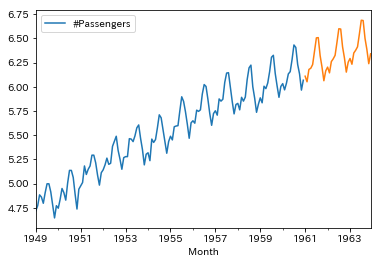

In [81]:
ax = ldf.plot()
pred.plot(ax=ax) #予測した分